In [1]:
# !pip install flask

In [2]:
# The Objective is to make a Customer segmentation model.
# RFM analysis 

# 1.Data preprocessing
# a.Handeling missing values // b.Outlier handeling // c.Handeling duplicate values // d.Typecasting // e.Data transformation // f.Normalization / Scaling // g.feature selection
# 2.EDA
# a.continuous variable outliers(scatterplot / box plot) b.missing values (heat map) 3.data distribution continuous variables (hist plot) 4.categorical (bar plot / pie chart)
# 3.Data split
# 4.Model building
# parameters// hyperparameters // algorithms based on data 
# 5.Model evaluation
# multiple model evaluation metrics
# 6. Model deployment


In [3]:
#!pip install kneed
# !pip install feature_engine
from kneed import KneeLocator

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
# from sklearn.preprocessing import LabelEncoder - used with label variable generally.
from sklearn.preprocessing import OneHotEncoder

# for pipelines and stuff
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# clustering algos
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# evaluation metrics for clustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Gridsearch cv
from sklearn.model_selection import GridSearchCV

# Saving Models as pickle files
import pickle

In [5]:
data = pd.read_csv(r"movie_chain_customers.csv",index_col= 'Customer ID')
d1 = pd.read_csv(r"movie_chain_customers.csv")
cust_id = d1["Customer ID"]

In [6]:
data.head()

,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Snacks Preferred,Loyalty Points,Membership Subscription,Willingness to Suggest Friends,Season,Total Visits Last 6 Months,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence
Customer ID,,,,,,,,,,,,
924197,21,10,2,NaN,6,Gold,9,Non-holiday,14,12.10,0.864224,0.1
562958,3,5,1,Popcorn,50,Gold,9,Non-holiday,7,15.12,2.159691,1.9
381632,11,5,2,Popcorn,43,Silver,5,Non-holiday,10,28.00,2.799720,4.0
363028,11,3,2,Popcorn,36,NaN,6,Non-holiday,10,19.39,1.938806,5.8
176588,27,3,0,Nachos,81,Platinum,3,Non-holiday,13,7.07,0.543804,2.8


In [7]:
# NaN values are not identified as null values 

In [8]:
data[data.isna()].sum()

Avg Days After Last Visit          0.0
Avg Money Spent on Ticket          0.0
Avg People Appeared With           0.0
Snacks Preferred                     0
Loyalty Points                     0.0
Membership Subscription              0
Willingness to Suggest Friends     0.0
Season                               0
Total Visits Last 6 Months         0.0
Total Money Spent per Visit        0.0
Avg Money Spent per Visit          0.0
Distance Theatre from Residence    0.0
dtype: object

In [9]:
columns = data.columns
columns

Index(['Avg Days After Last Visit', 'Avg Money Spent on Ticket',
       'Avg People Appeared With', 'Snacks Preferred', 'Loyalty Points',
       'Membership Subscription', 'Willingness to Suggest Friends', 'Season',
       'Total Visits Last 6 Months', 'Total Money Spent per Visit',
       'Avg Money Spent per Visit', 'Distance Theatre from Residence'],
      dtype='object')

In [10]:
obj_cols = ['Snacks Preferred','Membership Subscription','Season']
num_cols_descrete = [ 'Loyalty Points', 'Willingness to Suggest Friends','Total Visits Last 6 Months']
num_cols_continuous = ['Avg Days After Last Visit', 'Avg Money Spent on Ticket',
       'Avg People Appeared With', 'Total Money Spent per Visit',
       'Avg Money Spent per Visit', 'Distance Theatre from Residence']

In [11]:
# Data types present in the data set
# 1.Discrete numerical 2.Continuous numerical 3.categorical 

In [12]:
data[obj_cols] = data[obj_cols].astype('object')
data[num_cols_descrete] = data[num_cols_descrete].astype('int64')

In [13]:
data.head()

,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Snacks Preferred,Loyalty Points,Membership Subscription,Willingness to Suggest Friends,Season,Total Visits Last 6 Months,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence
Customer ID,,,,,,,,,,,,
924197,21,10,2,NaN,6,Gold,9,Non-holiday,14,12.10,0.864224,0.1
562958,3,5,1,Popcorn,50,Gold,9,Non-holiday,7,15.12,2.159691,1.9
381632,11,5,2,Popcorn,43,Silver,5,Non-holiday,10,28.00,2.799720,4.0
363028,11,3,2,Popcorn,36,NaN,6,Non-holiday,10,19.39,1.938806,5.8
176588,27,3,0,Nachos,81,Platinum,3,Non-holiday,13,7.07,0.543804,2.8


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12357 entries, 924197 to 993085
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Avg Days After Last Visit        12357 non-null  int64  
 1   Avg Money Spent on Ticket        12357 non-null  int64  
 2   Avg People Appeared With         12357 non-null  int64  
 3   Snacks Preferred                 11130 non-null  object 
 4   Loyalty Points                   12357 non-null  int64  
 5   Membership Subscription          7427 non-null   object 
 6   Willingness to Suggest Friends   12357 non-null  int64  
 7   Season                           12357 non-null  object 
 8   Total Visits Last 6 Months       12357 non-null  int64  
 9   Total Money Spent per Visit      12357 non-null  float64
 10  Avg Money Spent per Visit        12357 non-null  float64
 11  Distance Theatre from Residence  12357 non-null  float64
dtypes: float64(3), in

In [15]:
# handeling missing values
data['Membership Subscription'].fillna('Not-a-Sub',inplace = True)
data['Snacks Preferred'].fillna('No-snack',inplace = True)

# rounding off
data["Total Money Spent per Visit"] = data["Total Money Spent per Visit"].round(2)
data["Avg Money Spent per Visit"] = data["Avg Money Spent per Visit"].round(2)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12357 entries, 924197 to 993085
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Avg Days After Last Visit        12357 non-null  int64  
 1   Avg Money Spent on Ticket        12357 non-null  int64  
 2   Avg People Appeared With         12357 non-null  int64  
 3   Snacks Preferred                 12357 non-null  object 
 4   Loyalty Points                   12357 non-null  int64  
 5   Membership Subscription          12357 non-null  object 
 6   Willingness to Suggest Friends   12357 non-null  int64  
 7   Season                           12357 non-null  object 
 8   Total Visits Last 6 Months       12357 non-null  int64  
 9   Total Money Spent per Visit      12357 non-null  float64
 10  Avg Money Spent per Visit        12357 non-null  float64
 11  Distance Theatre from Residence  12357 non-null  float64
dtypes: float64(3), in

C:\Users\gunas\AppData\Local\Temp\ipykernel_25524\2901602640.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Membership Subscription'].fillna('Not-a-Sub',inplace = True)
C:\Users\gunas\AppData\Local\Temp\ipykernel_25524\2901602640.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [16]:
data.head()

,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Snacks Preferred,Loyalty Points,Membership Subscription,Willingness to Suggest Friends,Season,Total Visits Last 6 Months,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence
Customer ID,,,,,,,,,,,,
924197,21,10,2,No-snack,6,Gold,9,Non-holiday,14,12.10,0.86,0.1
562958,3,5,1,Popcorn,50,Gold,9,Non-holiday,7,15.12,2.16,1.9
381632,11,5,2,Popcorn,43,Silver,5,Non-holiday,10,28.00,2.80,4.0
363028,11,3,2,Popcorn,36,Not-a-Sub,6,Non-holiday,10,19.39,1.94,5.8
176588,27,3,0,Nachos,81,Platinum,3,Non-holiday,13,7.07,0.54,2.8


In [17]:
# encode the categorical columns 
ohe = OneHotEncoder(sparse_output = True)
ct = ColumnTransformer(transformers=[("One hot",ohe,obj_cols)], remainder = "passthrough",force_int_remainder_cols=False)
ct.fit(data)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('One hot', OneHotEncoder(),
                                 ['Snacks Preferred', 'Membership Subscription',
                                  'Season'])])

In [18]:
enc_cols = list(ct.named_transformers_["One hot"].get_feature_names_out())
cols = enc_cols+num_cols_descrete + num_cols_continuous


In [19]:
transformed_data = pd.DataFrame(ct.transform(data),columns=cols)
transformed_data
# categorical variables
#1.barchart 2.piecharts 

,Snacks Preferred_Hotdog,Snacks Preferred_Nachos,Snacks Preferred_No-snack,Snacks Preferred_Popcorn,Membership Subscription_Gold,Membership Subscription_Not-a-Sub,Membership Subscription_Platinum,Membership Subscription_Silver,Season_Holiday,Season_Non-holiday,Loyalty Points,Willingness to Suggest Friends,Total Visits Last 6 Months,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,10.0,2.0,6.0,9.0,14.0,12.10,0.86,0.1
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,1.0,50.0,9.0,7.0,15.12,2.16,1.9
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,11.0,5.0,2.0,43.0,5.0,10.0,28.00,2.80,4.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,3.0,2.0,36.0,6.0,10.0,19.39,1.94,5.8
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27.0,3.0,0.0,81.0,3.0,13.0,7.07,0.54,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,56.0,5.0,2.0,37.0,2.0,9.0,15.88,1.76,7.4
12353,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,57.0,5.0,2.0,34.0,6.0,11.0,18.33,1.67,6.9
12354,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,41.0,5.0,2.0,27.0,3.0,13.0,11.39,0.88,3.0
12355,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8.0,3.0,2.0,40.0,7.0,5.0,16.93,3.39,4.8


In [20]:
num_cols_descrete = [ 'Loyalty Points', 'Willingness to Suggest Friends','Total Visits Last 6 Months']
num_cols_continuous = ['Avg Days After Last Visit', 'Avg Money Spent on Ticket',
       'Avg People Appeared With', 'Total Money Spent per Visit',
       'Avg Money Spent per Visit', 'Distance Theatre from Residence']

Text(0.5, 1.0, 'Avg Money Spent per Visit')

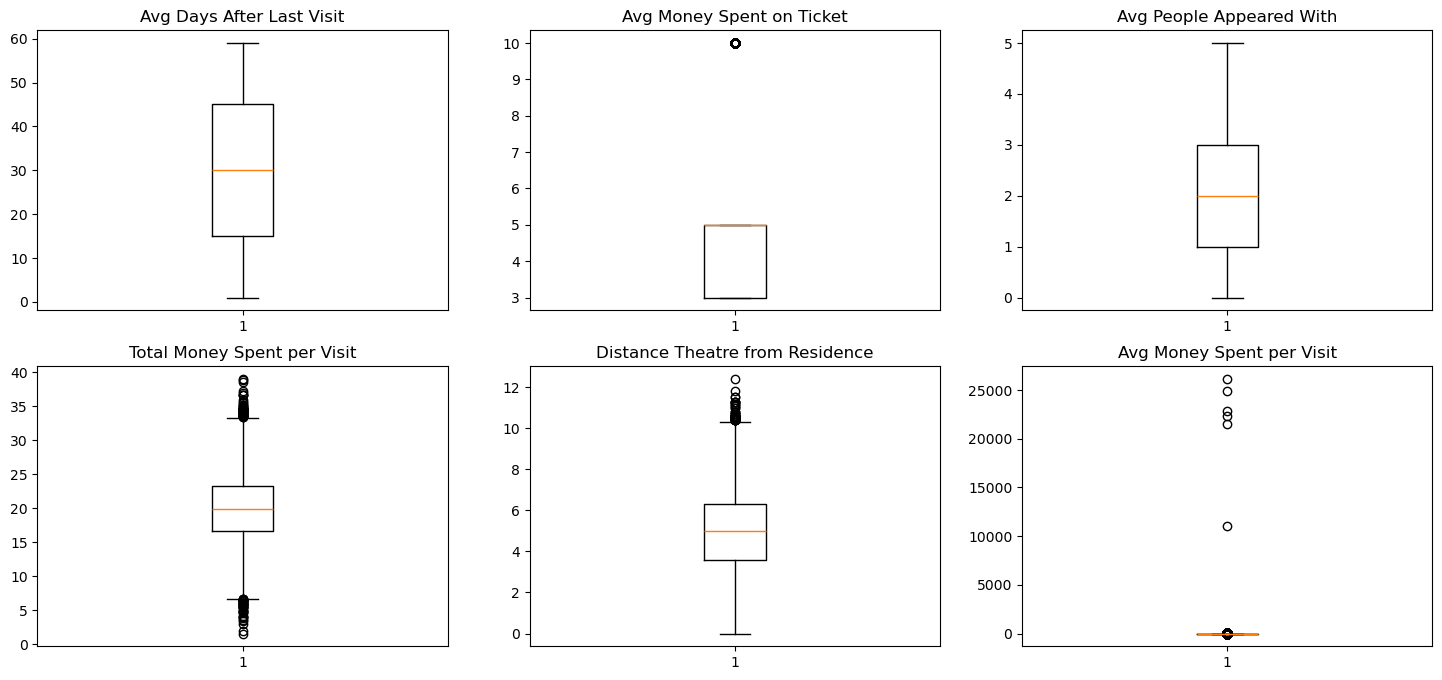

In [21]:
# continuos variables
# 1.Outliers
fig , axes = plt.subplots(2,3,figsize = (18,8))
axes[0,0].boxplot(data['Avg Days After Last Visit'])
axes[0,0].set_title('Avg Days After Last Visit')
axes[0,1].boxplot(data['Avg Money Spent on Ticket'])
axes[0,1].set_title('Avg Money Spent on Ticket')
axes[0,2].boxplot(data['Avg People Appeared With'])
axes[0,2].set_title('Avg People Appeared With')
axes[1,0].boxplot(data['Total Money Spent per Visit'])
axes[1,0].set_title('Total Money Spent per Visit')
axes[1,1].boxplot(data['Distance Theatre from Residence'])
axes[1,1].set_title('Distance Theatre from Residence')
axes[1,2].boxplot(data['Avg Money Spent per Visit'])
axes[1,2].set_title('Avg Money Spent per Visit')


In [22]:
# handeling outliers
win = Winsorizer(capping_method="iqr",tail = "both",fold = 1.5)
for i in num_cols_continuous:
    data[i] = win.fit_transform(pd.DataFrame(data[i]))


Text(0.5, 1.0, 'Avg Money Spent per Visit')

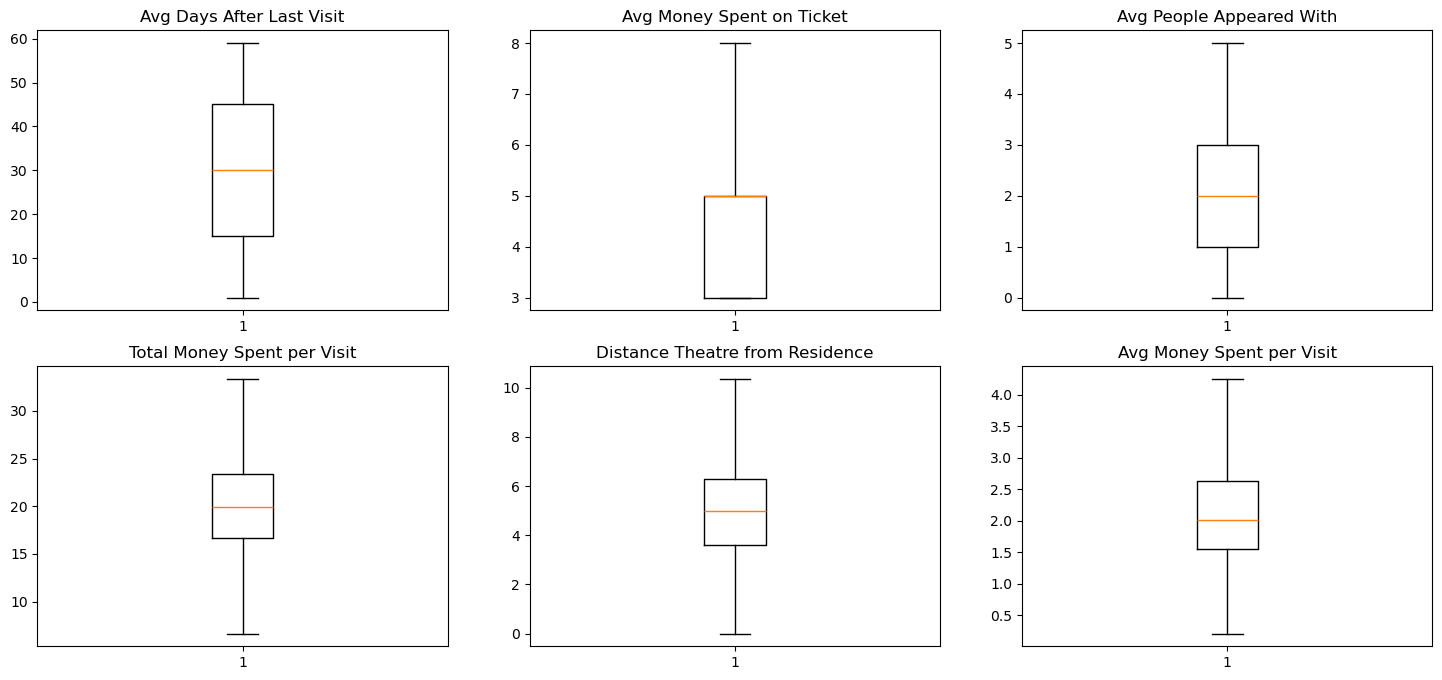

In [23]:
fig , axes = plt.subplots(2,3,figsize = (18,8))
axes[0,0].boxplot(data['Avg Days After Last Visit'])
axes[0,0].set_title('Avg Days After Last Visit')
axes[0,1].boxplot(data['Avg Money Spent on Ticket'])
axes[0,1].set_title('Avg Money Spent on Ticket')
axes[0,2].boxplot(data['Avg People Appeared With'])
axes[0,2].set_title('Avg People Appeared With')
axes[1,0].boxplot(data['Total Money Spent per Visit'])
axes[1,0].set_title('Total Money Spent per Visit')
axes[1,1].boxplot(data['Distance Theatre from Residence'])
axes[1,1].set_title('Distance Theatre from Residence')
axes[1,2].boxplot(data['Avg Money Spent per Visit'])
axes[1,2].set_title('Avg Money Spent per Visit')

Text(0.5, 1.0, 'Avg Money Spent per Visit')

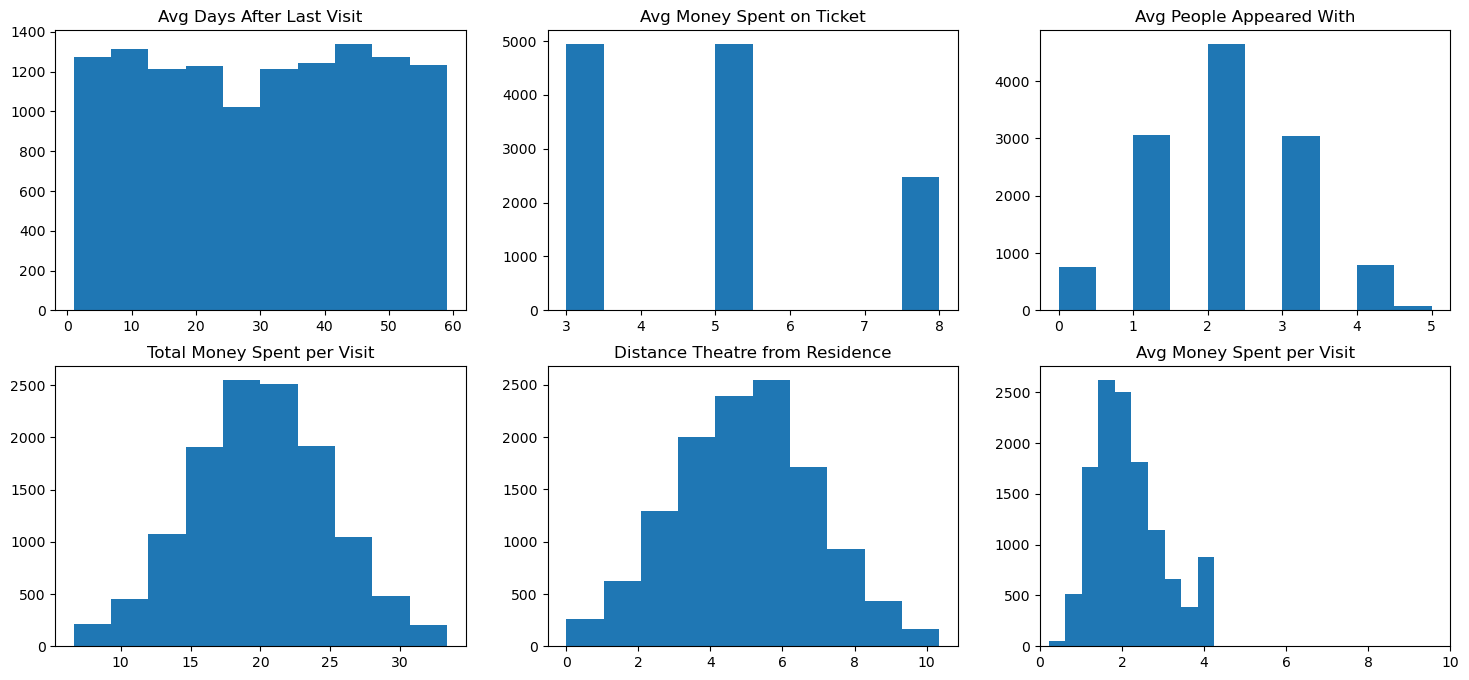

In [24]:
# distribution (discrete variables)
fig , axes = plt.subplots(2,3,figsize = (18,8))
axes[0,0].hist(data['Avg Days After Last Visit'])
axes[0,0].set_title('Avg Days After Last Visit')
axes[0,1].hist(data['Avg Money Spent on Ticket'])
axes[0,1].set_title('Avg Money Spent on Ticket')
axes[0,2].hist(data['Avg People Appeared With'])
axes[0,2].set_title('Avg People Appeared With')
axes[1,0].hist(data['Total Money Spent per Visit'])
axes[1,0].set_title('Total Money Spent per Visit')
axes[1,1].hist(data['Distance Theatre from Residence'])
axes[1,1].set_title('Distance Theatre from Residence')
axes[1,2].hist(data['Avg Money Spent per Visit'])
axes[1,2].set_xlim([0,10])
axes[1,2].set_title('Avg Money Spent per Visit')

In [25]:
# 1.Kmeans
k_means = KMeans()

# Knee locator
k_values = range(2,40)
sse = [kmeans.fit(transformed_data).inertia_ for kmeans in [KMeans(n_clusters=k) for k in k_values]]
kn = KneeLocator(k_values, sse, curve="convex", direction="decreasing")
optimal_k = kn.knee

([<matplotlib.axis.XTick at 0x1d287713bf0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39')])

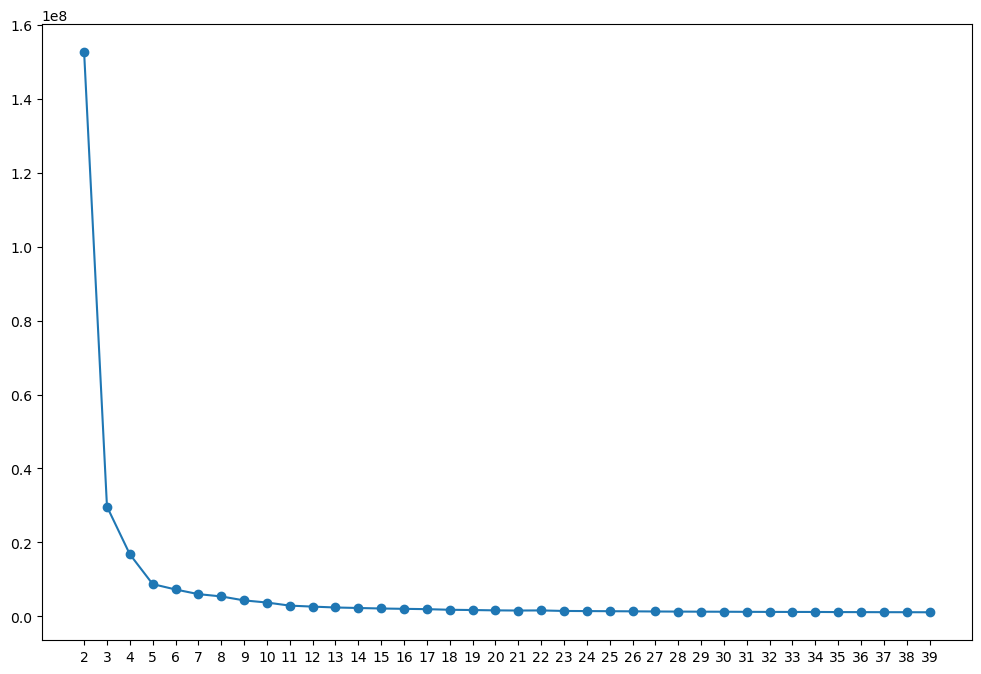

In [26]:
plt.figure(figsize = (12,8))
plt.plot(k_values,sse,marker = 'o')
plt.xticks(k_values)

In [27]:
optimal_k

5

In [28]:
# clusters 2d plot

In [29]:
k_means = KMeans(n_clusters = 5)
scores = {'sil_score' : silhouette_score(transformed_data,k_means.fit_predict(transformed_data)) ,
'calinski_score' : calinski_harabasz_score(transformed_data,k_means.fit_predict(transformed_data))}

print(scores)

{'sil_score': 0.43888915203349943, 'calinski_score': 1032592.8030712701}


# Clustered Data K-Means

In [30]:
transformed_data.head()

,Snacks Preferred_Hotdog,Snacks Preferred_Nachos,Snacks Preferred_No-snack,Snacks Preferred_Popcorn,Membership Subscription_Gold,Membership Subscription_Not-a-Sub,Membership Subscription_Platinum,Membership Subscription_Silver,Season_Holiday,Season_Non-holiday,Loyalty Points,Willingness to Suggest Friends,Total Visits Last 6 Months,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,10.0,2.0,6.0,9.0,14.0,12.10,0.86,0.1
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,1.0,50.0,9.0,7.0,15.12,2.16,1.9
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,11.0,5.0,2.0,43.0,5.0,10.0,28.00,2.80,4.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,3.0,2.0,36.0,6.0,10.0,19.39,1.94,5.8
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27.0,3.0,0.0,81.0,3.0,13.0,7.07,0.54,2.8


In [31]:
p = k_means.fit_predict(transformed_data)
l = pd.DataFrame(p,columns = ["cluster"])
Kmeans_clustered_data = pd.concat([transformed_data,l], axis = 1)

In [32]:
# adding the customer ID column to the dataframe
Kmeans_clustered_data = Kmeans_clustered_data.set_index(cust_id)
Kmeans_clustered_data = Kmeans_clustered_data.reset_index()
Kmeans_clustered_data.tail()

,Customer ID,Snacks Preferred_Hotdog,Snacks Preferred_Nachos,Snacks Preferred_No-snack,Snacks Preferred_Popcorn,Membership Subscription_Gold,Membership Subscription_Not-a-Sub,Membership Subscription_Platinum,Membership Subscription_Silver,Season_Holiday,...,Loyalty Points,Willingness to Suggest Friends,Total Visits Last 6 Months,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence,cluster
12352,456264,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,56.0,5.0,2.0,37.0,2.0,9.0,15.88,1.76,7.4,0
12353,254158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,57.0,5.0,2.0,34.0,6.0,11.0,18.33,1.67,6.9,0
12354,776318,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,41.0,5.0,2.0,27.0,3.0,13.0,11.39,0.88,3.0,0
12355,687135,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8.0,3.0,2.0,40.0,7.0,5.0,16.93,3.39,4.8,0
12356,993085,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,41.0,3.0,1.0,59.0,3.0,7.0,17.44,2.49,5.1,3


In [33]:
mms = MinMaxScaler()
mms.fit(transformed_data)
scaled_transformed_data  = pd.DataFrame(mms.transform(transformed_data))
# Saving the model 
# mms_saved_model = pickle.dump(mms)

In [34]:
# 2. Hierarchical clustering 
score = []
for i in range(2,40):
    aggl = AgglomerativeClustering(n_clusters = i,linkage = "complete")
    labels = aggl.fit_predict(scaled_transformed_data)
    score.append(silhouette_score(scaled_transformed_data,labels))

print(score)

[0.13600620029865773, 0.1514482429701363, 0.14774831593542698, 0.15653595040326376, 0.16793214907017256, 0.1796386493892325, 0.20153999125228284, 0.21409917976874257, 0.22113227067109595, 0.2352972552411659, 0.24264837006573906, 0.2563340585678987, 0.24764355878461342, 0.2940814738030219, 0.308930453166069, 0.3232267905700179, 0.33216866143797574, 0.3357066325090339, 0.35199956041783426, 0.36783294241723663, 0.37484813290235436, 0.38966462327769064, 0.3967983161347802, 0.40791428127822216, 0.415989002660816, 0.41916748404444026, 0.4050880536246668, 0.4095673692443149, 0.413270017306795, 0.4164080111706231, 0.4201355726661448, 0.42131283075330744, 0.3999893547745314, 0.38898280411445824, 0.37036209031529715, 0.3645365212375557, 0.35741626340954663, 0.35164193278626393]


<Axes: >

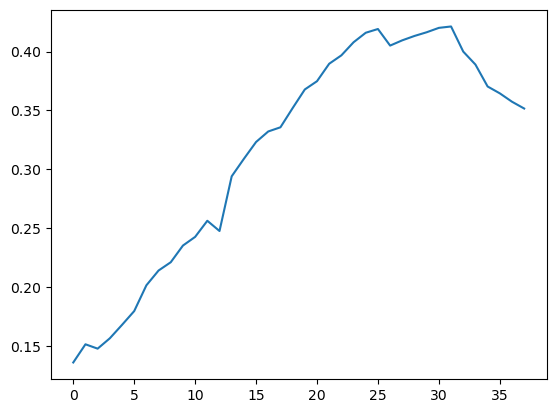

In [35]:
sns.lineplot(score)

In [36]:
aggl = AgglomerativeClustering(n_clusters = 33,linkage = "complete")
labels = aggl.fit_predict(scaled_transformed_data)

In [37]:
X = pd.concat([scaled_transformed_data,pd.DataFrame(labels,columns = ["labels"])],axis = 1)

In [38]:
X.head()
X["labels"].unique()

array([23,  2,  0,  6, 14, 13,  7, 20, 28, 30,  4,  3,  1, 29, 24,  9, 15,
       22,  5,  8, 16, 19, 31, 17, 12, 11, 27, 21, 18, 25, 10, 26, 32],
      dtype=int64)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [103.75, 103.75, 142.5, 142.5],
  [72.5, 72.5, 123.125, 123.125],
  [25.0, 25.0, 97.8125, 97.8125],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [165.0, 165.0, 190.0, 190.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [253.75, 253.75, 300.0, 300.0],
  [222.5, 222.5, 276.875, 276.875],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.0, 3

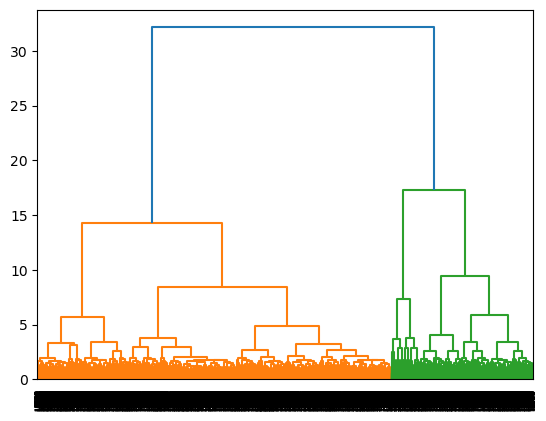

In [39]:
# Dendrogram for the agglomerated clusters
linkage_matrix = linkage(X,method = "complete")
dendrogram(linkage_matrix)

In [40]:
# This dendrgram indicates There are two main clusters, but the silhouette score and the calinski score are low if only two clusters are chosen
# The number of clusters pertaining to a good possible silhouette score is for 33 clusters.

In [41]:
print(silhouette_score(scaled_transformed_data,labels))
print(calinski_harabasz_score(scaled_transformed_data,labels))

0.42131283075330744
1350.960728304464


### Agglomerative Clustered data

In [42]:
l = pd.DataFrame(labels,columns = ["cluster"])
Agglo_clustered = pd.concat([transformed_data,l],axis = 1)
l["cluster"].unique()

array([23,  2,  0,  6, 14, 13,  7, 20, 28, 30,  4,  3,  1, 29, 24,  9, 15,
       22,  5,  8, 16, 19, 31, 17, 12, 11, 27, 21, 18, 25, 10, 26, 32],
      dtype=int64)

### Silhouette score if the number of clusters are 2

In [43]:
aggl2 = AgglomerativeClustering(n_clusters = 2, linkage = "complete")
labels2 = aggl2.fit_predict(scaled_transformed_data)
print(silhouette_score(scaled_transformed_data,labels2))

0.13600620029865773


In [44]:
Agglo_clustered = Agglo_clustered.set_index(cust_id)
Agglo_clustered = Agglo_clustered.reset_index()
Agglo_clustered.head()

,Customer ID,Snacks Preferred_Hotdog,Snacks Preferred_Nachos,Snacks Preferred_No-snack,Snacks Preferred_Popcorn,Membership Subscription_Gold,Membership Subscription_Not-a-Sub,Membership Subscription_Platinum,Membership Subscription_Silver,Season_Holiday,...,Loyalty Points,Willingness to Suggest Friends,Total Visits Last 6 Months,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence,cluster
0,924197,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,21.0,10.0,2.0,6.0,9.0,14.0,12.10,0.86,0.1,23
1,562958,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,5.0,1.0,50.0,9.0,7.0,15.12,2.16,1.9,2
2,381632,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,11.0,5.0,2.0,43.0,5.0,10.0,28.00,2.80,4.0,0
3,363028,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,11.0,3.0,2.0,36.0,6.0,10.0,19.39,1.94,5.8,6
4,176588,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,27.0,3.0,0.0,81.0,3.0,13.0,7.07,0.54,2.8,14


In [45]:
# DBSCAN 
mms = MinMaxScaler()
mms.fit(transformed_data)
scaled_transformed_data  = pd.DataFrame(mms.transform(transformed_data))

In [46]:
scaled_transformed_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.344828,1.000000,0.4,0.06,0.888889,0.636364,0.280833,0.000025,0.008065
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.285714,0.2,0.50,0.888889,0.318182,0.361452,0.000075,0.153226
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.172414,0.285714,0.4,0.43,0.444444,0.454545,0.705286,0.000099,0.322581
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.172414,0.000000,0.4,0.36,0.555556,0.454545,0.475440,0.000066,0.467742
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.448276,0.000000,0.0,0.81,0.222222,0.590909,0.146556,0.000013,0.225806


In [47]:
db = DBSCAN(eps = 0.9,min_samples=7)
la = db.fit_predict(scaled_transformed_data)
silhouette_score(scaled_transformed_data,la)

0.43475314627014966

### DBSCAN clustered data

In [48]:
l = pd.DataFrame(la,columns = ["cluster"])
DB_clustered = pd.concat([transformed_data, l], axis = 1)
DB_clustered["cluster"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, -1],
      dtype=int64)

In [49]:
DB_clustered = DB_clustered.set_index(cust_id)
DB_clustered = DB_clustered.reset_index()
DB_clustered.head()

,Customer ID,Snacks Preferred_Hotdog,Snacks Preferred_Nachos,Snacks Preferred_No-snack,Snacks Preferred_Popcorn,Membership Subscription_Gold,Membership Subscription_Not-a-Sub,Membership Subscription_Platinum,Membership Subscription_Silver,Season_Holiday,...,Loyalty Points,Willingness to Suggest Friends,Total Visits Last 6 Months,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence,cluster
0,924197,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,21.0,10.0,2.0,6.0,9.0,14.0,12.10,0.86,0.1,0
1,562958,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,5.0,1.0,50.0,9.0,7.0,15.12,2.16,1.9,1
2,381632,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,11.0,5.0,2.0,43.0,5.0,10.0,28.00,2.80,4.0,2
3,363028,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,11.0,3.0,2.0,36.0,6.0,10.0,19.39,1.94,5.8,3
4,176588,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,27.0,3.0,0.0,81.0,3.0,13.0,7.07,0.54,2.8,4


In [50]:
# DBSCAN + Gridsearch cv


#def silhouette_scorer(estimator, scaled_transformed_data):
#    labels = estimator.fit_predict(scaled_transformed_data)
#    # Ensure there is more than one cluster
#    return silhouette_score(scaled_transformed_data, labels)

## Parameter grid for DBSCAN
#param_grid = {
#    'eps': np.linspace(0.1, 1.0, 10),
#    'min_samples': [i for i in range(3,8)],
#}

## DBSCAN model
#dbscan = DBSCAN()

## GridSearchCV with custom scoring
#grid_search = GridSearchCV(
#    estimator=dbscan,
#    param_grid=param_grid,
#    scoring=make_scorer(silhouette_scorer),
#    cv=[(slice(None), slice(None))],  # No splitting for unsupervised data
#    verbose=1
#)


In [51]:
#grid_search.fit(scaled_transformed_data)
#print("Best Parameters:", grid_search.best_params_)
#print("Best Silhouette Score:", grid_search.best_score_)

In [52]:
# Saving the model 
with open('ohe_model.pkl', 'wb') as file:
    pickle.dump(ohe, file)
with open('kmeans.pkl', 'wb') as file:
    pickle.dump(k_means, file)
with open('mmscaler_model.pkl', 'wb') as file:
    pickle.dump(mms, file)
with open('aggl_model.pkl', 'wb') as file:
    pickle.dump(aggl, file)
with open('dbscan_model.pkl', 'wb') as file:
    pickle.dump(db, file)

# What the clusters Tell
1. Avg distance of travel
2. Avg spending
3. Avg number of people attending with
4. Fav snack of a group
5. Avg rating of suggestability
6. Avg Frequency of visit in last 6 months

In [53]:
# K_means clustered data
Kmeans_clustered_data.head()

,Customer ID,Snacks Preferred_Hotdog,Snacks Preferred_Nachos,Snacks Preferred_No-snack,Snacks Preferred_Popcorn,Membership Subscription_Gold,Membership Subscription_Not-a-Sub,Membership Subscription_Platinum,Membership Subscription_Silver,Season_Holiday,...,Loyalty Points,Willingness to Suggest Friends,Total Visits Last 6 Months,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence,cluster
0,924197,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,21.0,10.0,2.0,6.0,9.0,14.0,12.10,0.86,0.1,0
1,562958,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,5.0,1.0,50.0,9.0,7.0,15.12,2.16,1.9,3
2,381632,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,11.0,5.0,2.0,43.0,5.0,10.0,28.00,2.80,4.0,0
3,363028,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,11.0,3.0,2.0,36.0,6.0,10.0,19.39,1.94,5.8,0
4,176588,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,27.0,3.0,0.0,81.0,3.0,13.0,7.07,0.54,2.8,3


In [54]:
Kmeans_clustered_data.columns

Index(['Customer ID', 'Snacks Preferred_Hotdog', 'Snacks Preferred_Nachos',
       'Snacks Preferred_No-snack', 'Snacks Preferred_Popcorn',
       'Membership Subscription_Gold', 'Membership Subscription_Not-a-Sub',
       'Membership Subscription_Platinum', 'Membership Subscription_Silver',
       'Season_Holiday', 'Season_Non-holiday', 'Loyalty Points',
       'Willingness to Suggest Friends', 'Total Visits Last 6 Months',
       'Avg Days After Last Visit', 'Avg Money Spent on Ticket',
       'Avg People Appeared With', 'Total Money Spent per Visit',
       'Avg Money Spent per Visit', 'Distance Theatre from Residence',
       'cluster'],
      dtype='object')

In [55]:
Kmeans_clustered_data["snacks"] =Kmeans_clustered_data[['Snacks Preferred_Hotdog', 'Snacks Preferred_Nachos',
       'Snacks Preferred_No-snack', 'Snacks Preferred_Popcorn']].idxmax(axis = 1) 


Kmeans_clustered_data["subscription"] =Kmeans_clustered_data[['Membership Subscription_Gold', 'Membership Subscription_Not-a-Sub',
       'Membership Subscription_Platinum', 'Membership Subscription_Silver']].idxmax(axis = 1)

Kmeans_clustered_data["season"] =Kmeans_clustered_data[['Season_Holiday', 'Season_Non-holiday']].idxmax(axis = 1)

Kmeans_clustered_data.drop(['Snacks Preferred_Hotdog', 'Snacks Preferred_Nachos',
       'Snacks Preferred_No-snack', 'Snacks Preferred_Popcorn',
       'Membership Subscription_Gold', 'Membership Subscription_Not-a-Sub',
       'Membership Subscription_Platinum', 'Membership Subscription_Silver',
       'Season_Holiday', 'Season_Non-holiday'],axis =1 ,inplace = True)


In [56]:
Kmeans_clustered_data.head()

,Customer ID,Loyalty Points,Willingness to Suggest Friends,Total Visits Last 6 Months,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence,cluster,snacks,subscription,season
0,924197,21.0,10.0,2.0,6.0,9.0,14.0,12.10,0.86,0.1,0,Snacks Preferred_No-snack,Membership Subscription_Gold,Season_Non-holiday
1,562958,3.0,5.0,1.0,50.0,9.0,7.0,15.12,2.16,1.9,3,Snacks Preferred_Popcorn,Membership Subscription_Gold,Season_Non-holiday
2,381632,11.0,5.0,2.0,43.0,5.0,10.0,28.00,2.80,4.0,0,Snacks Preferred_Popcorn,Membership Subscription_Silver,Season_Non-holiday
3,363028,11.0,3.0,2.0,36.0,6.0,10.0,19.39,1.94,5.8,0,Snacks Preferred_Popcorn,Membership Subscription_Not-a-Sub,Season_Non-holiday
4,176588,27.0,3.0,0.0,81.0,3.0,13.0,7.07,0.54,2.8,3,Snacks Preferred_Nachos,Membership Subscription_Platinum,Season_Non-holiday


In [57]:
grouped_df = Kmeans_clustered_data.groupby("cluster")

for name, group  in grouped_df:
    print(name,group["Distance Theatre from Residence"].mean() )
    print(name , group["snacks"].value_counts())
    print(name, group["Willingness to Suggest Friends"].mean())
    print(name, group["season"].value_counts())

    print("*" * 40)
   


0 4.998301795245027
0 snacks
Snacks Preferred_Popcorn     3060
Snacks Preferred_Nachos      1239
Snacks Preferred_Hotdog      1229
Snacks Preferred_No-snack     655
Name: count, dtype: int64
0 5.155264434740417
0 season
Season_Non-holiday    4275
Season_Holiday        1908
Name: count, dtype: int64
****************************************
1 4.433333333333334
1 snacks
Snacks Preferred_Popcorn    3
Name: count, dtype: int64
1 8.333333333333334
1 season
Season_Non-holiday    2
Season_Holiday        1
Name: count, dtype: int64
****************************************
2 4.5
2 snacks
Snacks Preferred_Popcorn    1
Name: count, dtype: int64
2 3.0
2 season
Season_Non-holiday    1
Name: count, dtype: int64
****************************************
3 4.976053826199741
3 snacks
Snacks Preferred_Popcorn     3130
Snacks Preferred_Nachos      1252
Snacks Preferred_Hotdog      1215
Snacks Preferred_No-snack     571
Name: count, dtype: int64
3 5.237516212710765
3 season
Season_Non-holiday    4301
Season

In [ ]:
# Kmeans clustered data has a good silhuette score for 3, 4, 5 clusters but the number of records are less.
# We need more clusters to get detailed clusters or clusters with more homogenity.

In [59]:
# DBSCAN Clustered Data
DB_clustered["snacks"] =DB_clustered[['Snacks Preferred_Hotdog', 'Snacks Preferred_Nachos',
       'Snacks Preferred_No-snack', 'Snacks Preferred_Popcorn']].idxmax(axis = 1) 


DB_clustered["subscription"] =DB_clustered[['Membership Subscription_Gold', 'Membership Subscription_Not-a-Sub',
       'Membership Subscription_Platinum', 'Membership Subscription_Silver']].idxmax(axis = 1)

DB_clustered["season"] =DB_clustered[['Season_Holiday', 'Season_Non-holiday']].idxmax(axis = 1)

DB_clustered.drop(['Snacks Preferred_Hotdog', 'Snacks Preferred_Nachos',
       'Snacks Preferred_No-snack', 'Snacks Preferred_Popcorn',
       'Membership Subscription_Gold', 'Membership Subscription_Not-a-Sub',
       'Membership Subscription_Platinum', 'Membership Subscription_Silver',
       'Season_Holiday', 'Season_Non-holiday'],axis =1 ,inplace = True)

In [60]:
DB_clustered.head()

,Customer ID,Loyalty Points,Willingness to Suggest Friends,Total Visits Last 6 Months,Avg Days After Last Visit,Avg Money Spent on Ticket,Avg People Appeared With,Total Money Spent per Visit,Avg Money Spent per Visit,Distance Theatre from Residence,cluster,snacks,subscription,season
0,924197,21.0,10.0,2.0,6.0,9.0,14.0,12.10,0.86,0.1,0,Snacks Preferred_No-snack,Membership Subscription_Gold,Season_Non-holiday
1,562958,3.0,5.0,1.0,50.0,9.0,7.0,15.12,2.16,1.9,1,Snacks Preferred_Popcorn,Membership Subscription_Gold,Season_Non-holiday
2,381632,11.0,5.0,2.0,43.0,5.0,10.0,28.00,2.80,4.0,2,Snacks Preferred_Popcorn,Membership Subscription_Silver,Season_Non-holiday
3,363028,11.0,3.0,2.0,36.0,6.0,10.0,19.39,1.94,5.8,3,Snacks Preferred_Popcorn,Membership Subscription_Not-a-Sub,Season_Non-holiday
4,176588,27.0,3.0,0.0,81.0,3.0,13.0,7.07,0.54,2.8,4,Snacks Preferred_Nachos,Membership Subscription_Platinum,Season_Non-holiday


# Insights from the Clusters

In [61]:
grouped_df = DB_clustered.groupby("cluster")

for name, group  in grouped_df:
    print(str(name)+"_" + "shape"+"_",group.shape )
    print(str(name)+"_" + "Distance Theatre from Residence"+"_",  group["Distance Theatre from Residence"].mean() )
    print(str(name)+"_"  ,  group["snacks"].value_counts())
    print(str(name)+"_" +"Avg Willingness to suggest a friend" + "_" ,  group["Willingness to Suggest Friends"].mean())
    print(str(name)+"_" +"people by season" + "_",group["season"].value_counts())
    print(str(name)+"_"+ "avg money spent per visit by an individual"+"_",group["Avg Money Spent per Visit"].mean())
    print(str(name)+"_"+ "avg No of visits in last 6 months"+"_",group['Total Visits Last 6 Months'].value_counts())
    print("*" * 40)
   

-1_shape_ (6, 14)
-1_Distance Theatre from Residence_ 4.033333333333333
-1_ snacks
Snacks Preferred_Popcorn     3
Snacks Preferred_No-snack    2
Snacks Preferred_Hotdog      1
Name: count, dtype: int64
-1_Avg Willingness to suggest a friend_ 7.166666666666667
-1_people by season_ season
Season_Non-holiday    4
Season_Holiday        2
Name: count, dtype: int64
-1_avg money spent per visit by an individual_ 19610.313333333335
-1_avg No of visits in last 6 months_ Total Visits Last 6 Months
0.0    2
1.0    2
2.0    1
3.0    1
Name: count, dtype: int64
****************************************
0_shape_ (187, 14)
0_Distance Theatre from Residence_ 5.192513368983957
0_ snacks
Snacks Preferred_No-snack    187
Name: count, dtype: int64
0_Avg Willingness to suggest a friend_ 5.759358288770054
0_people by season_ season
Season_Non-holiday    187
Name: count, dtype: int64
0_avg money spent per visit by an individual_ 2.1948663101604273
0_avg No of visits in last 6 months_ Total Visits Last 6 Month

# 1.clusters where no snacks or single snacks are consumed <br>
###  Cross selling could be done or introducing some more varients in the same snack.<br>

# 2.clusters where avg willingness to suggest a friend is high and low <br>
### if avg willingness to suggest is low, Try to take reviews of various eminities with incentives like loyalty points etc..<br>

# 3.clusters where avg money spent is high and low<br>
### If The avg money spent is low, then low priced snacks or itenerary can be explored inorder to capture that group.<br>

# 4.Avg distance of travel by the customers<br>
### We can circle down the area in which people are visiting, Then can strategise to beat the competetors in the same area.<br>
### Arrange some activities to relax which can increase the number of customers from long distances.<br>

# 5.Clusters which are active in holiday season and non holiday seasons<br>
### If the number of people who visit on holidays is huge, The movies to be played can be selected in the same way to have better ROIs.<br>
### We also need to increase the number of people visiting in the non-holiday season.<br>

# 6. Avg number of people in each visit<br>
### This number can be increased if there are offers and incentives in booking tickets as groups,<br>
### Break even is another aspect that needs attention to make this happen.<br>

Text(0, 0.5, 'Cluster')

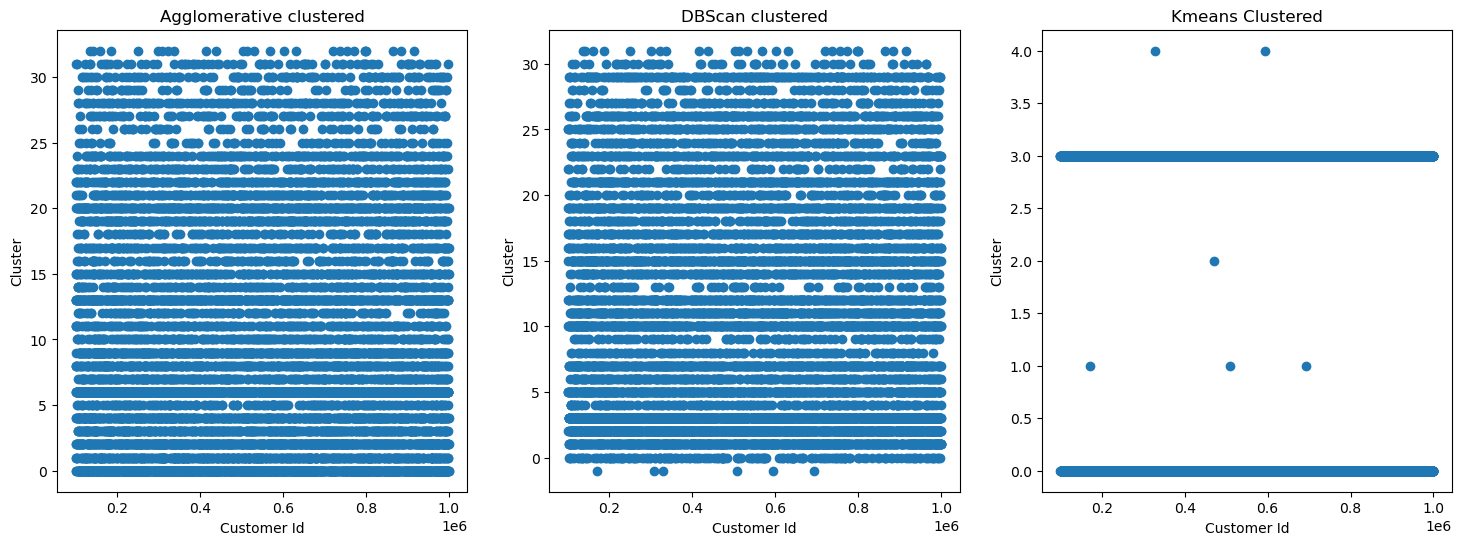

In [62]:
fig , axes = plt.subplots(1,3,figsize = (18,6),sharex= True)
axes[0].scatter(x = Agglo_clustered["Customer ID"], y = Agglo_clustered["cluster"])
axes[0].set_title('Agglomerative clustered')
axes[0].set_xlabel("Customer Id")
axes[0].set_ylabel("Cluster")
axes[1].scatter(x = DB_clustered["Customer ID"], y = DB_clustered["cluster"])
axes[1].set_title('DBScan clustered')
axes[1].set_xlabel("Customer Id")
axes[1].set_ylabel("Cluster")
axes[2].scatter(x = Kmeans_clustered_data["Customer ID"], y = Kmeans_clustered_data["cluster"])
axes[2].set_title('Kmeans Clustered')
axes[2].set_xlabel("Customer Id")
axes[2].set_ylabel("Cluster")

<Axes: xlabel='Customer ID', ylabel='cluster'>

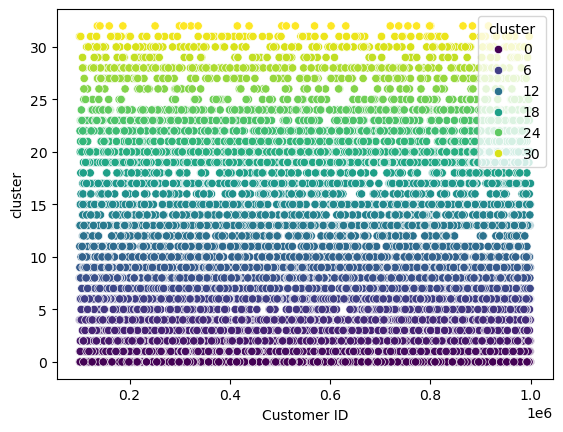

In [63]:
sns.scatterplot(Agglo_clustered,x = "Customer ID", y = "cluster",palette="viridis",hue = "cluster")

<Axes: xlabel='Customer ID', ylabel='cluster'>

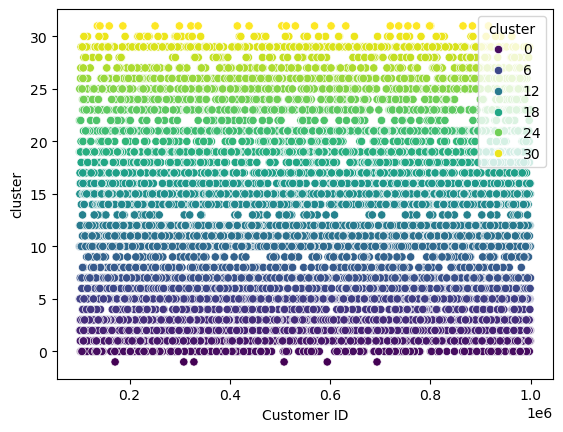

In [64]:
sns.scatterplot(DB_clustered,x = "Customer ID", y = "cluster",palette="viridis",hue = "cluster")

<Axes: xlabel='Customer ID', ylabel='cluster'>

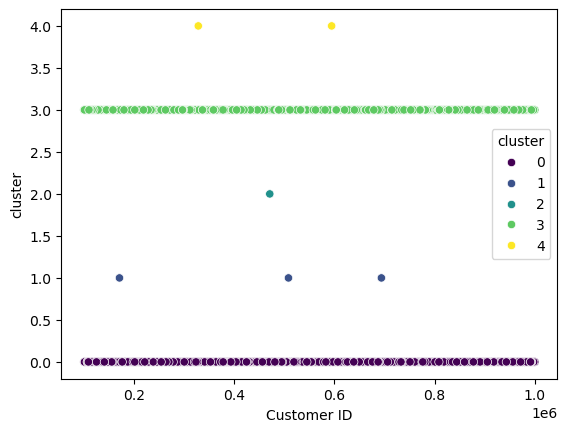

In [65]:
sns.scatterplot(Kmeans_clustered_data,x = "Customer ID", y = "cluster",palette="viridis",hue = "cluster")

In [ ]:
#!pip install pyspark

     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.5/317.3 MB 5.6 MB/s eta 0:00:57
     ---------------------------------------- 1.6/317.3 MB 3.6 MB/s eta 0:01:27
     ---------------------------------------- 2.6/317.3 MB 4.3 MB/s eta 0:01:13
     ---------------------------------------- 3.7/317.3 MB 4.5 MB/s eta 0:01:10
      --------------------------------------- 4.5/317.3 MB 4.4 MB/s eta 0:01:12
      --------------------------------------- 5.5/317.3 MB 4.5 MB/s eta 0:01:09
      --------------------------------------- 6.0/317.3 MB 4.4 MB/s eta 0:01:11
      --------------------------------------- 6.8/317.3 MB 4.2 MB/s eta 0:01:14
      --------------------------------------- 7.6/317.3 MB 4.3 MB/s eta 0:01:13
     - -------------------------------------- 8.4/317.3 MB 4.2 MB/s eta 0:01:14
     - -------------------------------------- 9.2/317.3 MB 4.2 MB/s eta 0:01:15
     - ------------------------------------- 10